The purpose of this notebook is to analyze what is happening at a particular point (Ei = 125, E = 7.8125) where the covariance method inverse covariance matrix (and ellipse) do not correspond well to the inverse covariance method inferred from the mcvine resolution simulation data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
param_set_1 = [10., 8., 0.01, 0.01, 0.0015, 13.6, 11.41]
param_set_2 = [15.5, 13.5, 0.065, 0.065, 0.0125, 8.1, 9.41]

mcvine_inv_cov = np.array([[278.13378, -0.90888], [-0.90888, 0.080669]])
covmat_inv_cov_1 = np.array([[1087.2, 31.479], [31.479, 0.959569]])
covmat_inv_cov_2 = np.array([[300.94, 9.211], [9.211, 0.308395]])


diff_mat_1 = covmat_inv_cov_1 - mcvine_inv_cov
diff_mat_2 = covmat_inv_cov_2 - mcvine_inv_cov


print "diff_mat_1 = "
print diff_mat_1
print "diff_mat_2 = "
print diff_mat_2


diff_mat_1 = 
[[ 809.06622   32.38788]
 [  32.38788    0.8789 ]]
diff_mat_2 = 
[[ 22.80622   10.11988 ]
 [ 10.11988    0.227726]]


### Plot

In [5]:
def plot_ellipse(N):
    r = np.linalg.eig(N)
    mR = r[1]; lambdas = r[0]
    RR = 2*np.log(2)
    theta = np.arange(0, 360, 1.)*np.pi/180
    u1p = np.sqrt(RR/lambdas[0])*np.cos(theta)
    u2p = np.sqrt(RR/lambdas[1])*np.sin(theta)
    up = np.array([u1p, u2p]).T

    # print up.shape
    u = np.dot(up, mR.T)
    
    plt.plot(u[:,0], u[:,1], '.')
    plt.show()
    
    
    

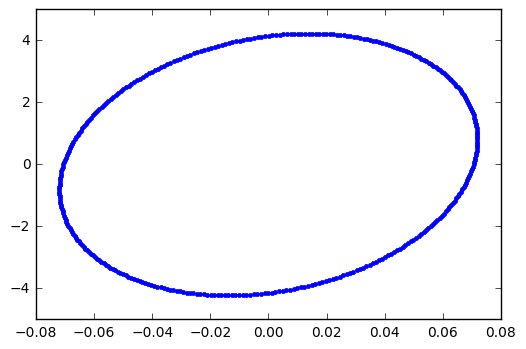

In [6]:
plot_ellipse(mcvine_inv_cov)

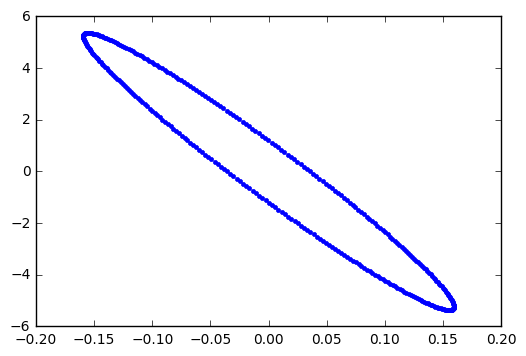

In [7]:
plot_ellipse(covmat_inv_cov_1)

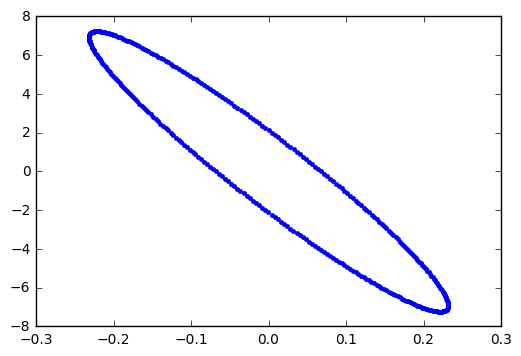

In [8]:
plot_ellipse(covmat_inv_cov_2)

[[  6.03046622e+03   1.74068880e+02]
 [  1.74068880e+02   4.73233100e+00]]


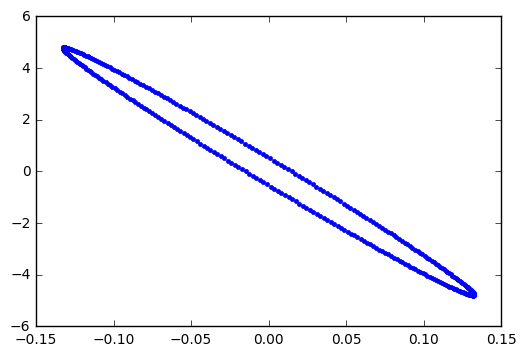

In [10]:
# new parameters using optimization via covariance (not inverse covariance) matrix comparison
param_set_3 = [9.2, 7.2, 0.002, 0.002, 0.0001, 12.85, 11.7]
covmat_inv_cov_3 = np.array([[6308.6, 173.16], [173.16, 4.813]])

diff_mat_3 = covmat_inv_cov_3 - mcvine_inv_cov

print diff_mat_3

plot_ellipse(covmat_inv_cov_3)